In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Null Values and Filling them

In [3]:
for col in df.columns: print(f'{col}: {df[col].isnull().mean() * 100:.2f}% null')

PassengerId: 0.00% null
HomePlanet: 2.31% null
CryoSleep: 2.50% null
Cabin: 2.29% null
Destination: 2.09% null
Age: 2.06% null
VIP: 2.34% null
RoomService: 2.08% null
FoodCourt: 2.11% null
ShoppingMall: 2.39% null
Spa: 2.11% null
VRDeck: 2.16% null
Name: 2.30% null
Transported: 0.00% null


In [4]:
for col in df.columns: print(f'{col} has {df[col].isna().mean() * 100:.2f}% null values')

PassengerId has 0.00% null values
HomePlanet has 2.31% null values
CryoSleep has 2.50% null values
Cabin has 2.29% null values
Destination has 2.09% null values
Age has 2.06% null values
VIP has 2.34% null values
RoomService has 2.08% null values
FoodCourt has 2.11% null values
ShoppingMall has 2.39% null values
Spa has 2.11% null values
VRDeck has 2.16% null values
Name has 2.30% null values
Transported has 0.00% null values


In [5]:
for col in df.columns: df[col] = df[col].fillna("NA" if df[col].dtype == 'O' else df[col].mean())

In [6]:
for col in df.columns:
    df[col].fillna("NA" if df[col].dtype == 'O' else df[col].mean(), inplace=True)


## SkewNess and its Correction

In [7]:
from scipy.stats import skew, yeojohnson
numeric_cols = df.select_dtypes(include='number').columns
skewness = df[numeric_cols].apply(lambda x: skew(x))
print("Skewness for numeric columns:")
skewness

Skewness for numeric columns:


Age              0.423405
RoomService      6.398865
FoodCourt        7.176920
ShoppingMall    12.779140
Spa              7.716326
VRDeck           7.904291
dtype: float64

In [8]:
for col in numeric_cols:
    df[col] = yeojohnson(df[col])[0] if skew(df[col]) < -1 else np.log1p(df[col]) if skew(df[col]) > 1 else df[col]

skewness_after_correction = df[numeric_cols].apply(lambda x: skew(x))
print("Skewness after correction:")
skewness_after_correction

Skewness after correction:


Age             0.423405
RoomService     1.035011
FoodCourt       1.024373
ShoppingMall    1.101136
Spa             1.005615
VRDeck          1.068783
dtype: float64

## Correlation Matrix

In [9]:
correlation_matrix  = df[numeric_cols].corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.111109,0.195816,0.091169,0.177916,0.157710
RoomService,0.111109,1.000000,0.083625,0.349902,0.151138,0.083554
FoodCourt,0.195816,0.083625,1.000000,0.091825,0.411238,0.438335
ShoppingMall,0.091169,0.349902,0.091825,1.000000,0.144684,0.103080
Spa,0.177916,0.151138,0.411238,0.144684,1.000000,0.357070
VRDeck,0.157710,0.083554,0.438335,0.103080,0.357070,1.000000


## Variance Inflation Factor, VIF

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_cols
vif_data["VIF"] = [variance_inflation_factor(df[numeric_cols].values, i) for i in range(len(numeric_cols))]
vif_data


,Feature,VIF
0,Age,2.174787
1,RoomService,1.655828
2,FoodCourt,2.020579
3,ShoppingMall,1.629213
4,Spa,1.918828
5,VRDeck,1.884862


### If VIF is more than 4, we can drop that feature

# Visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
categorical_cols = df.select_dtypes(include='object').columns

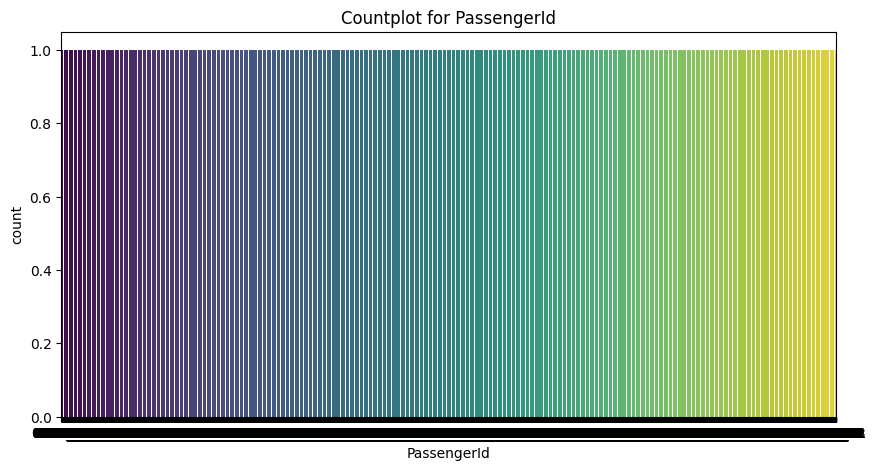

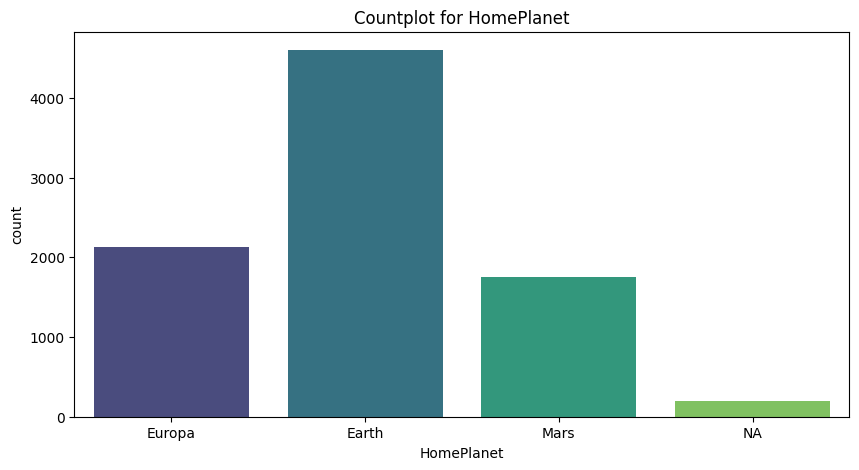

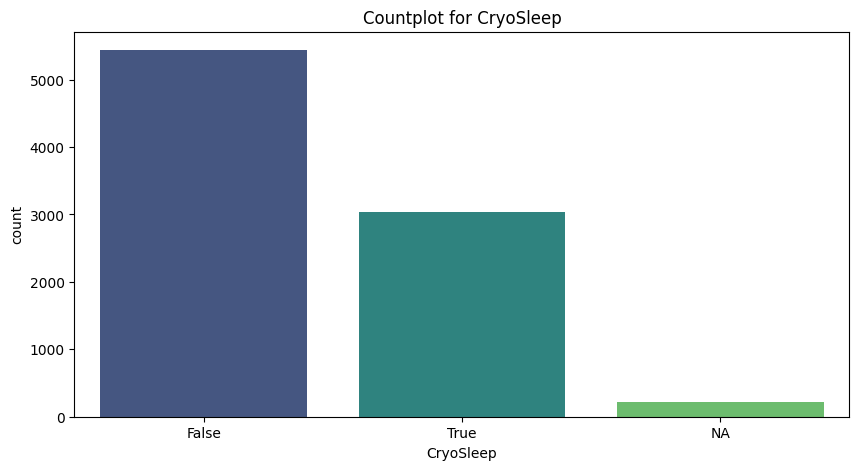

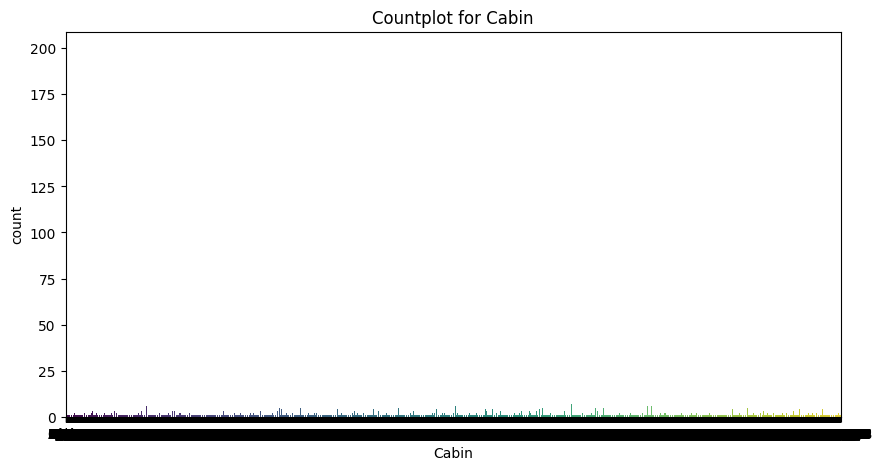

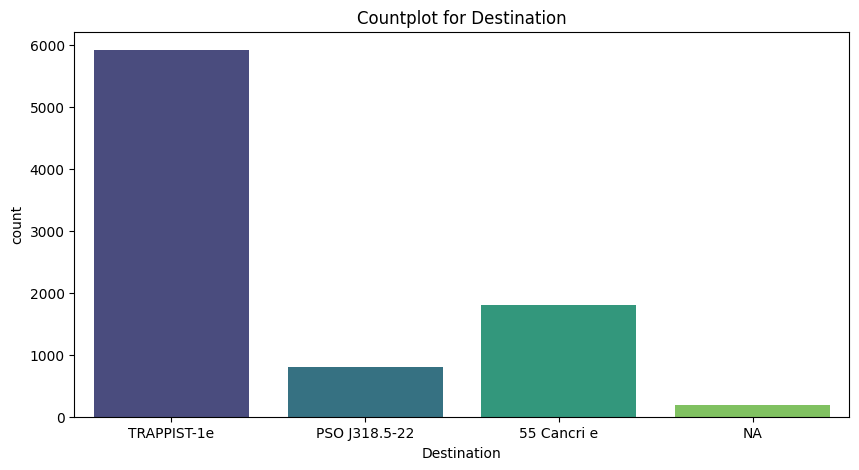

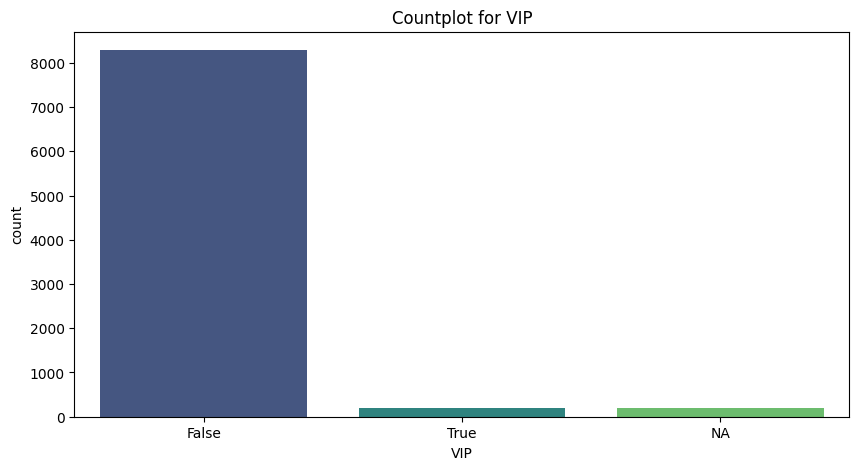

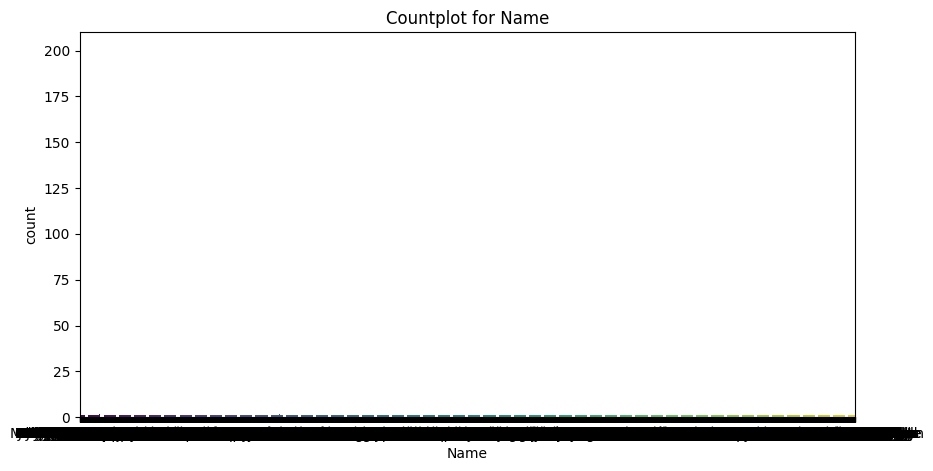

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Countplot for {col}')
    plt.show()

<Figure size 1000x500 with 0 Axes>

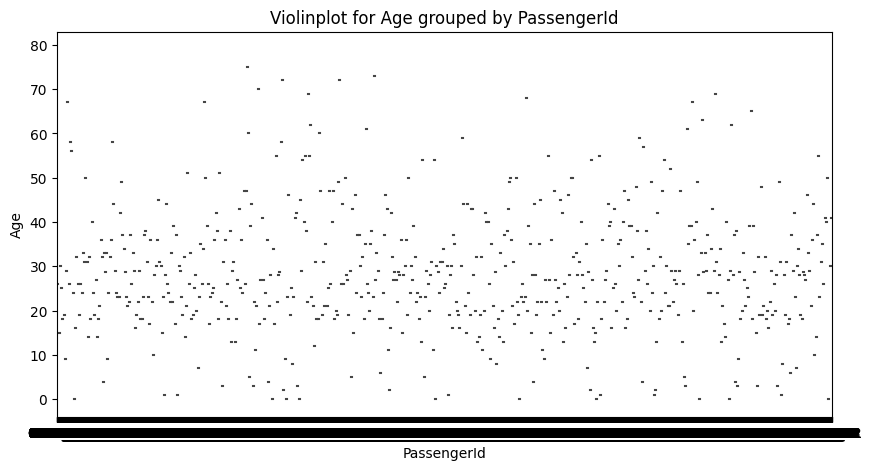

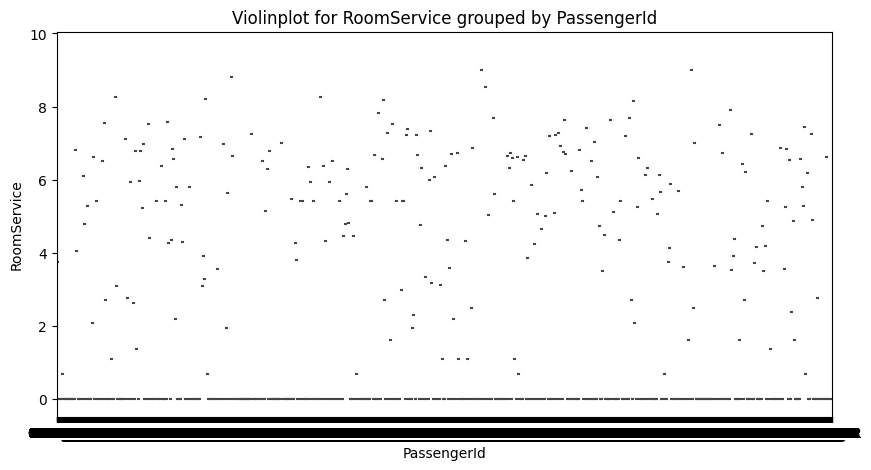

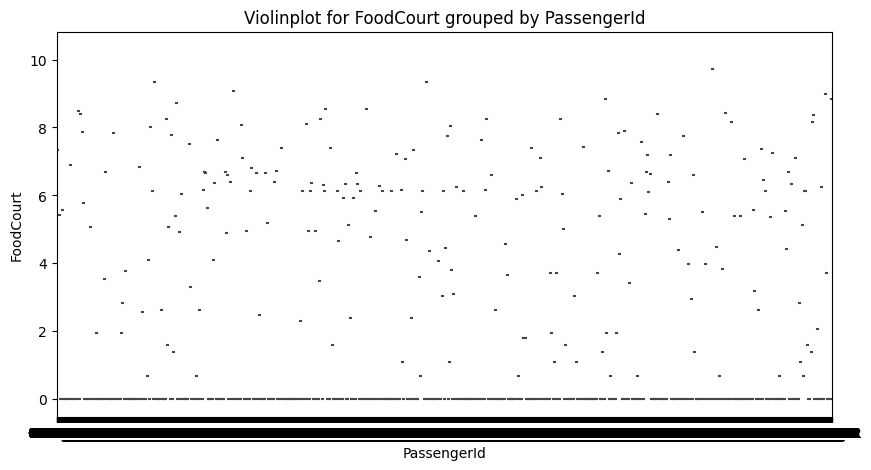

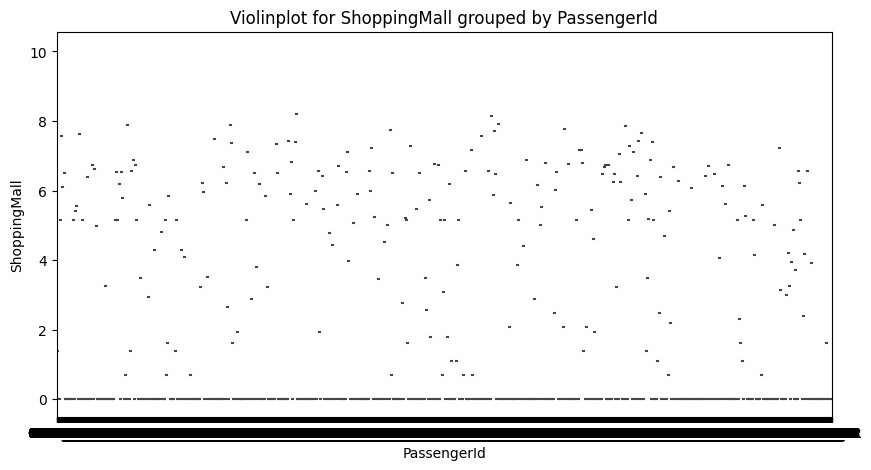

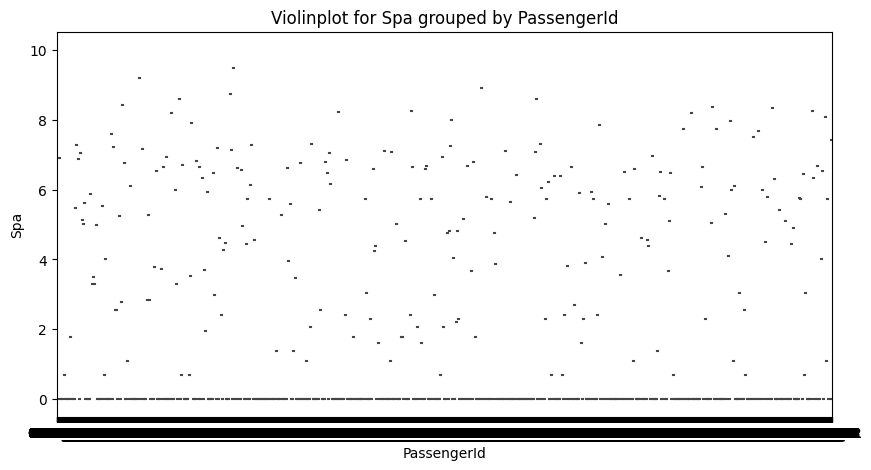

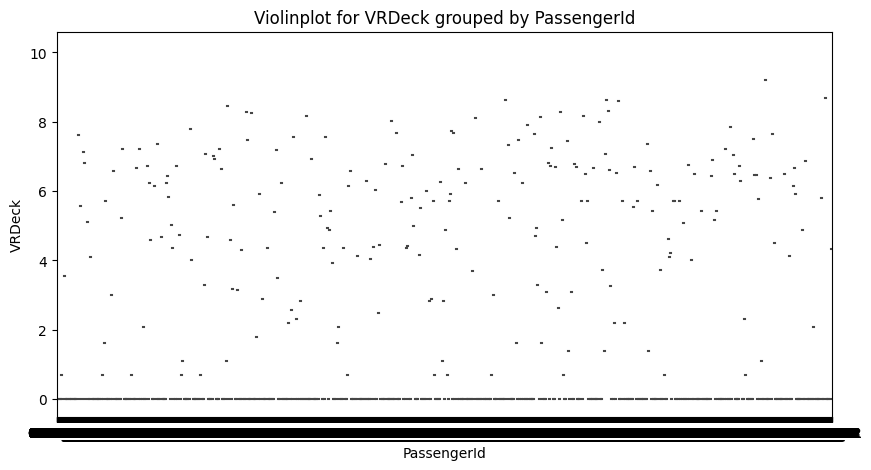

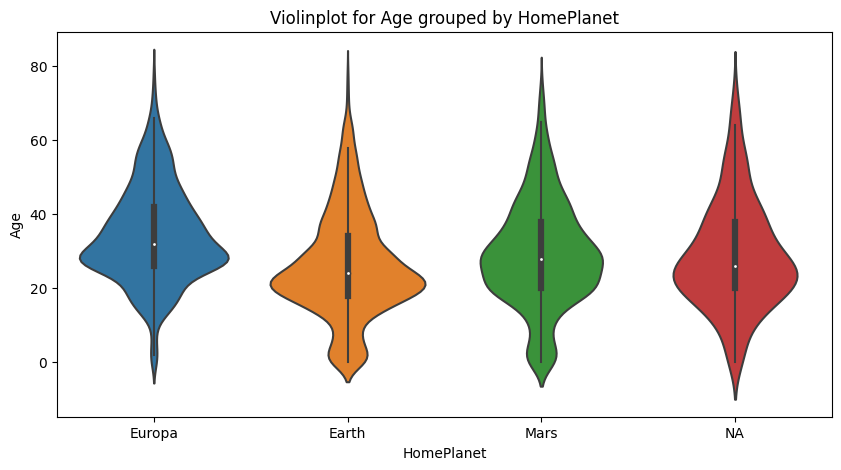

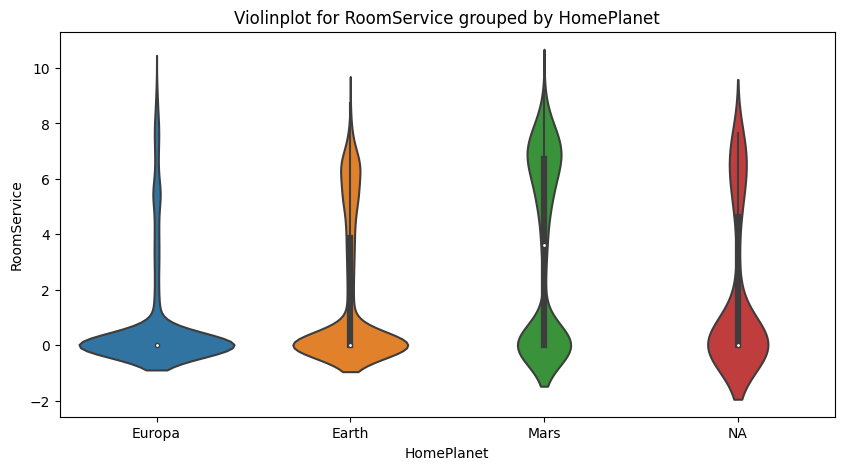

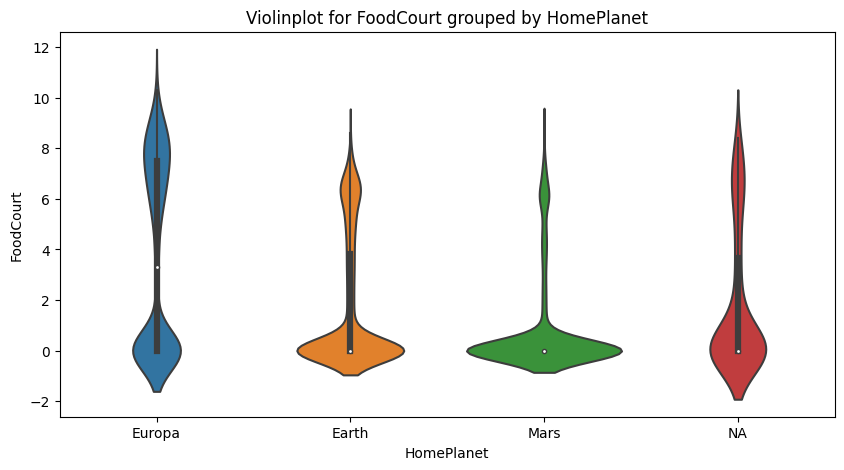

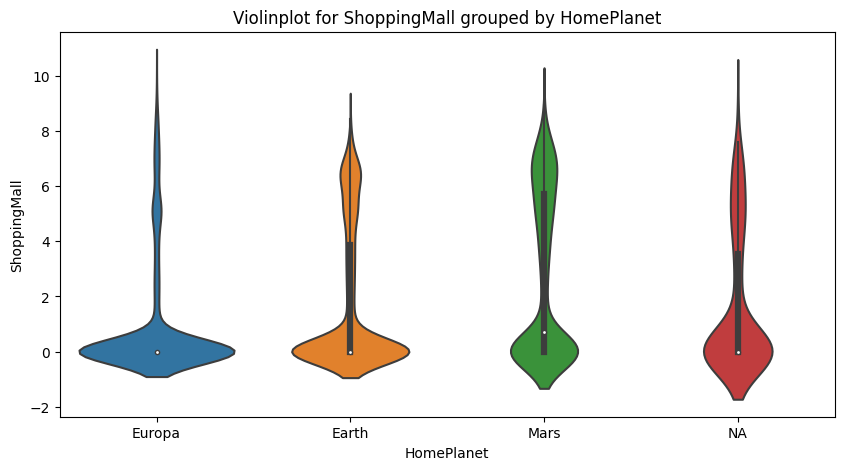

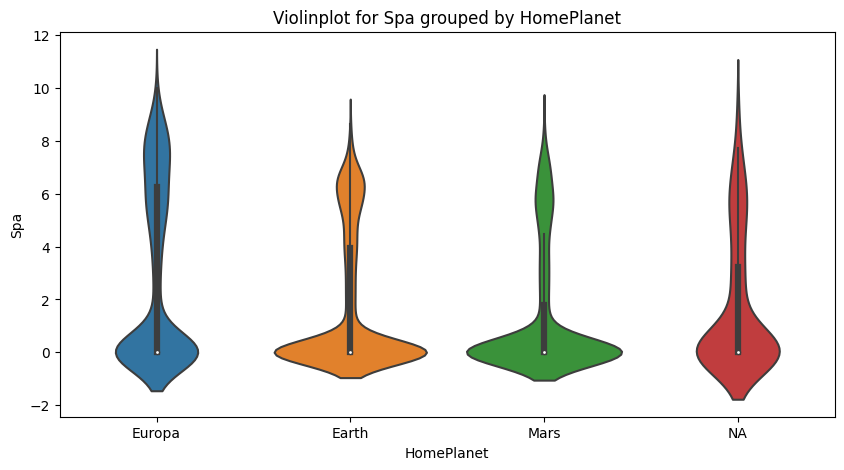

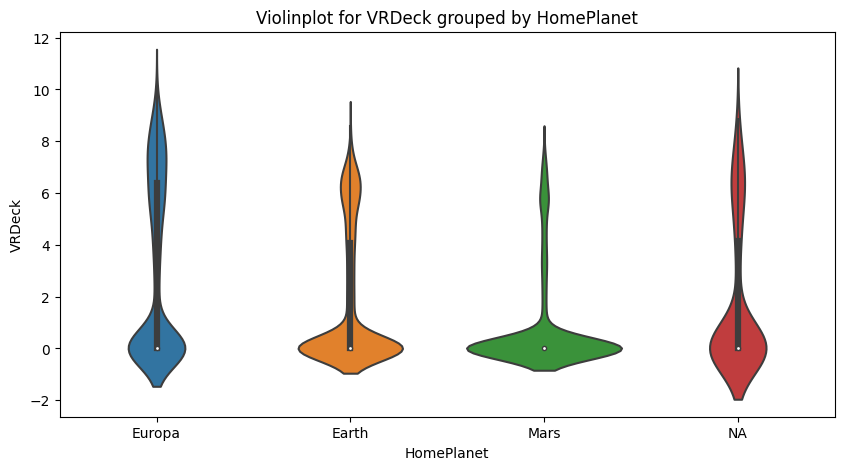

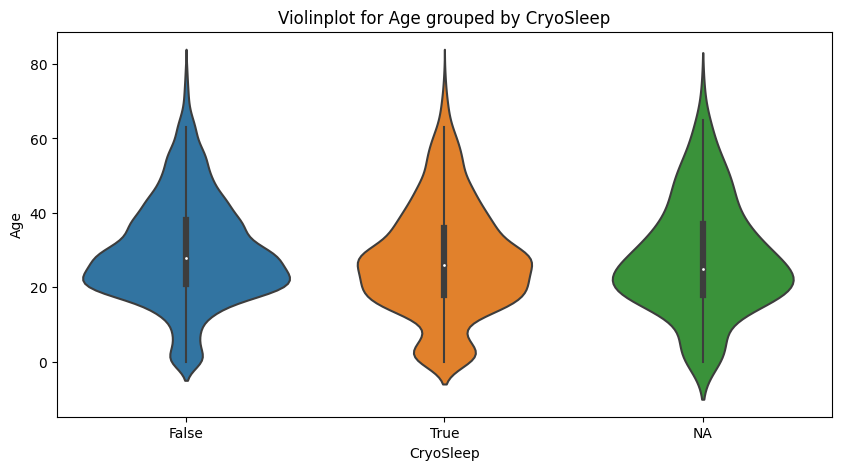

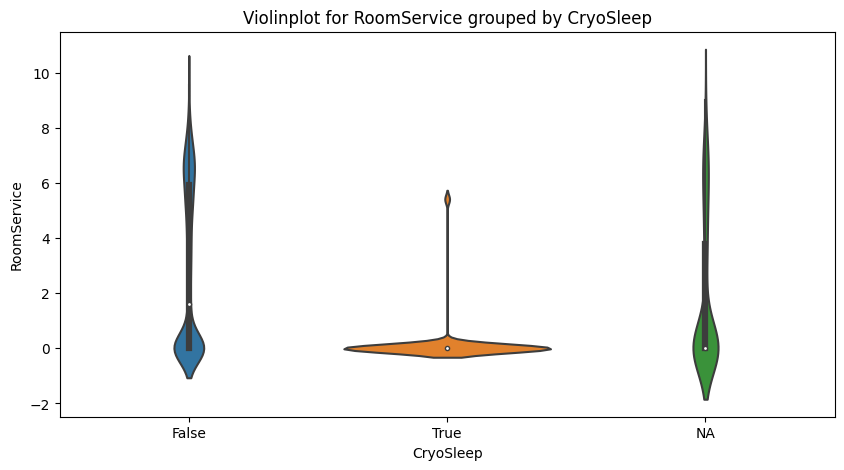

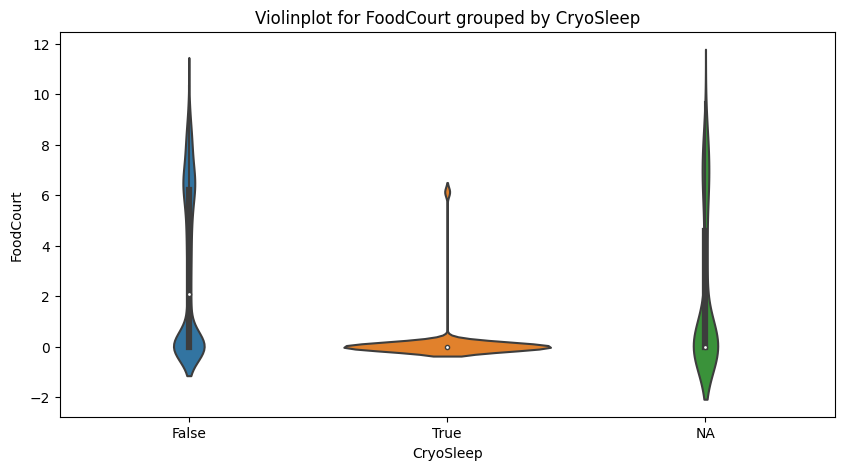

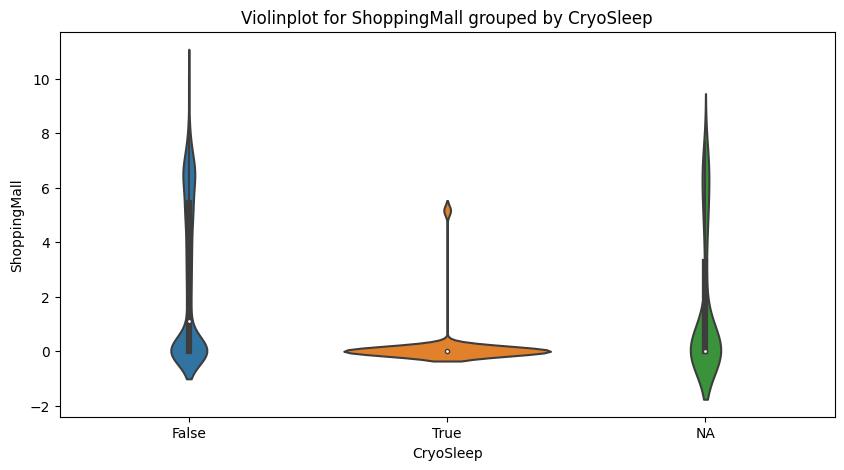

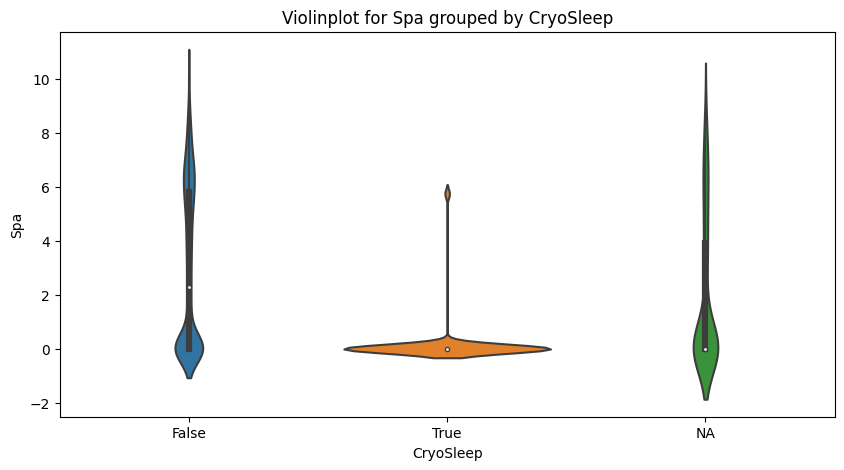

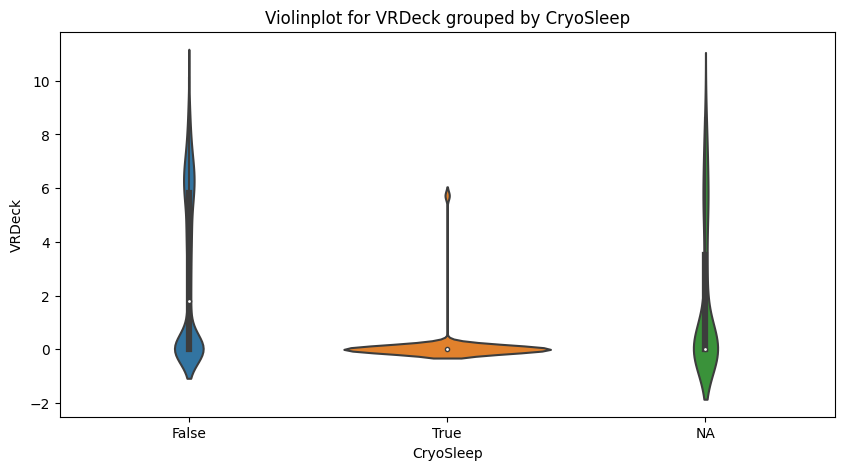

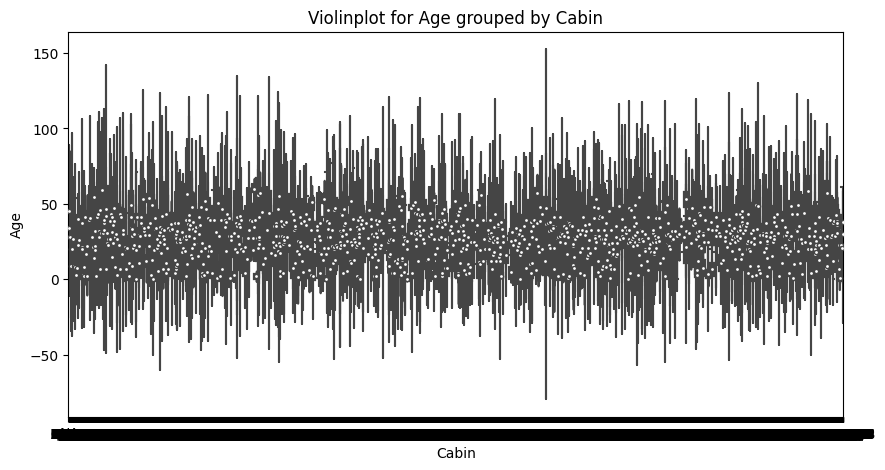

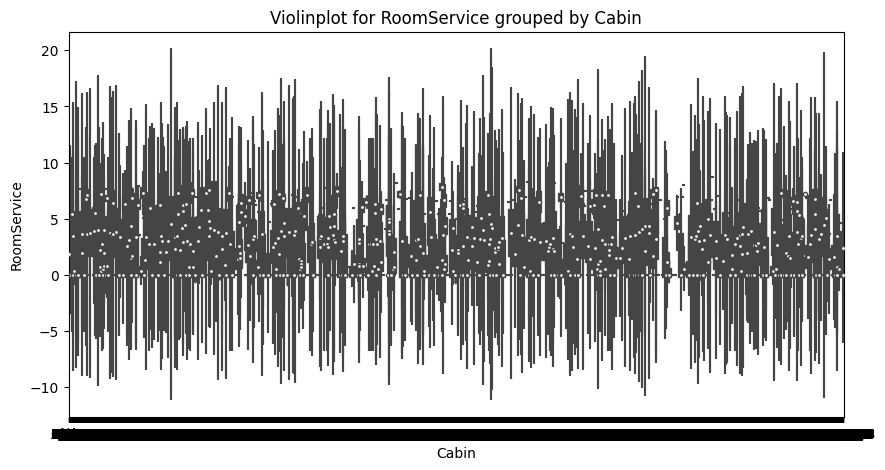

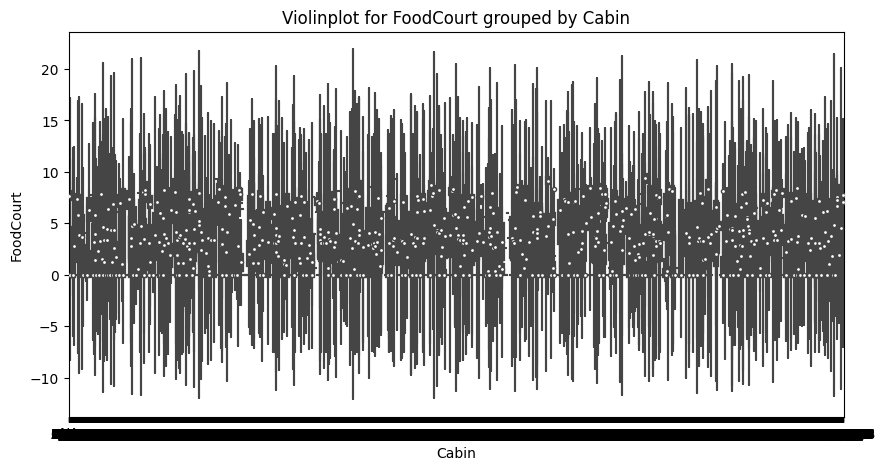

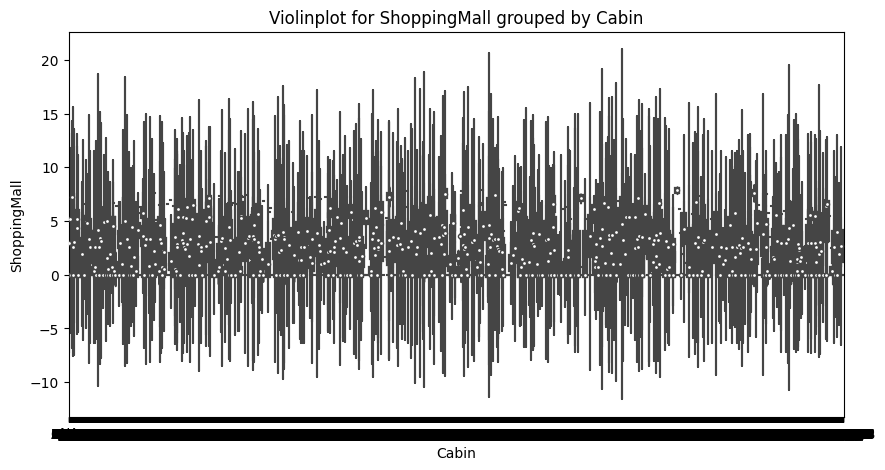

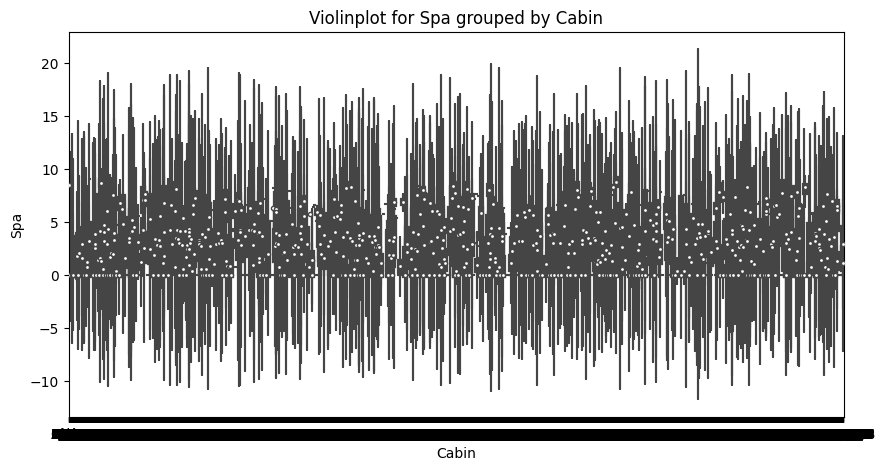

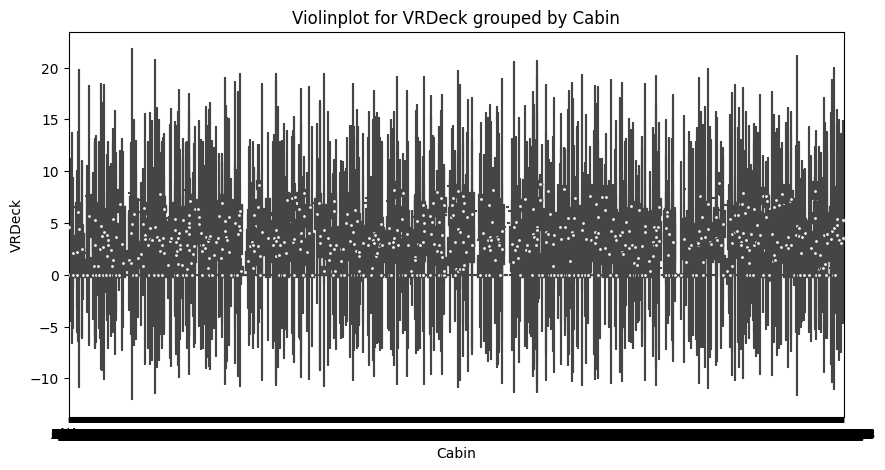

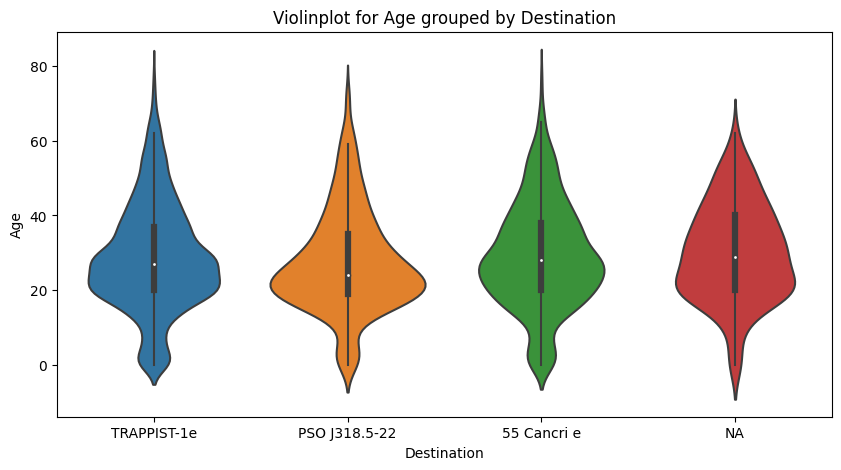

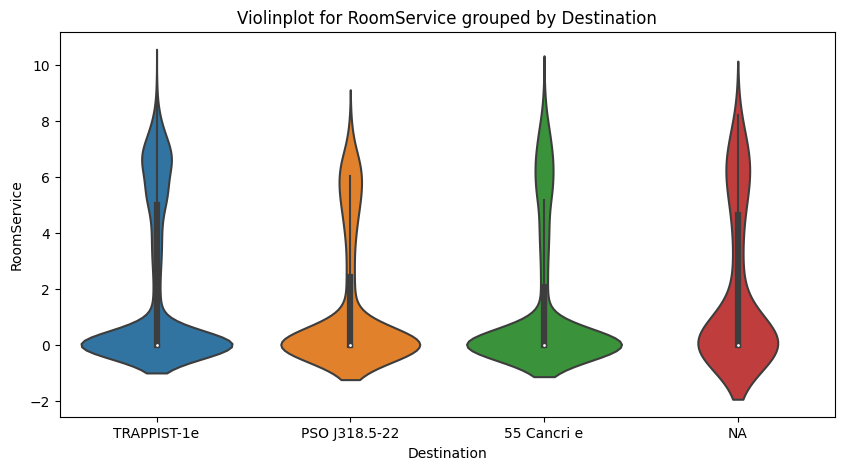

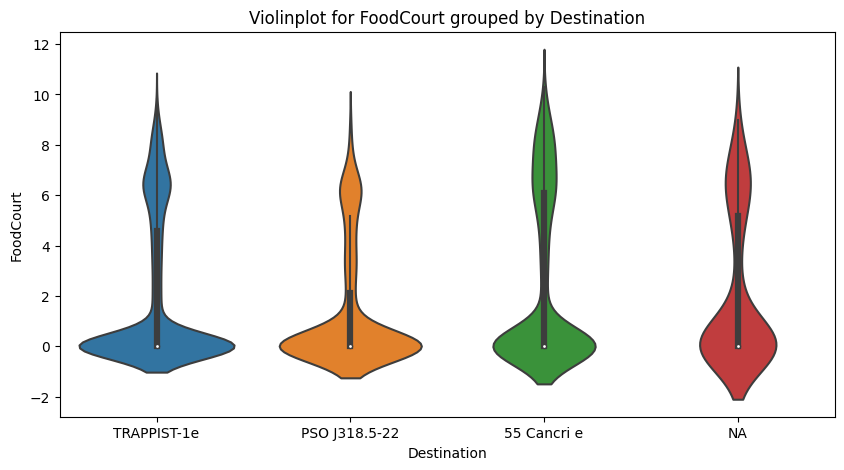

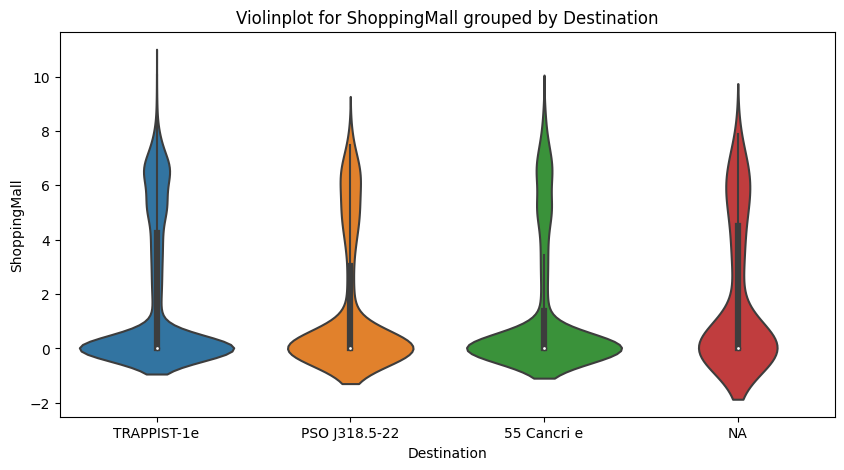

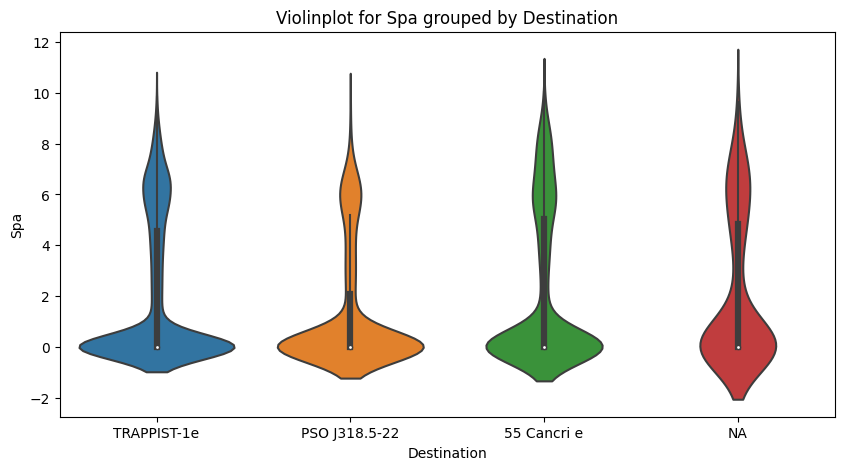

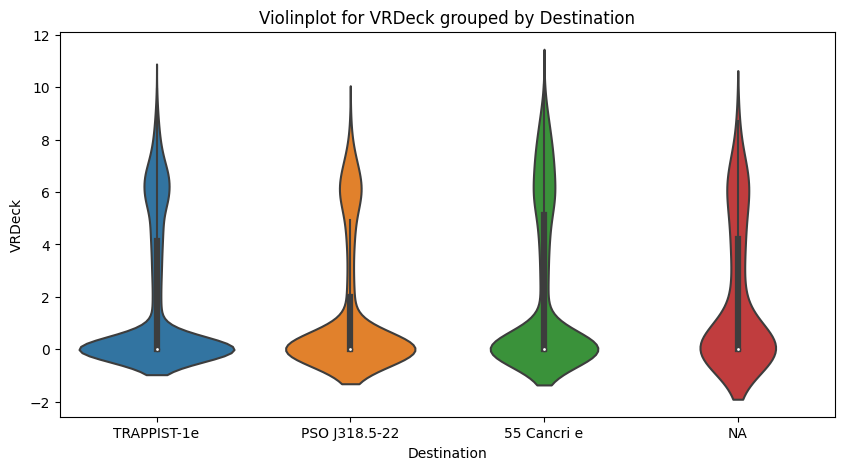

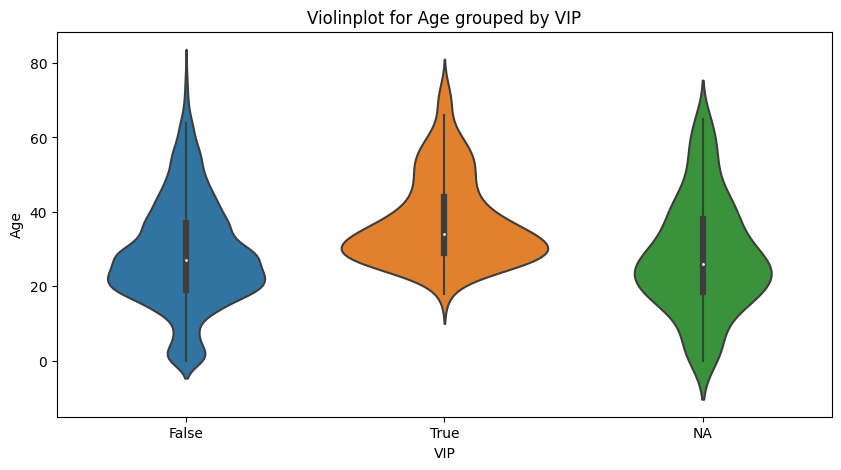

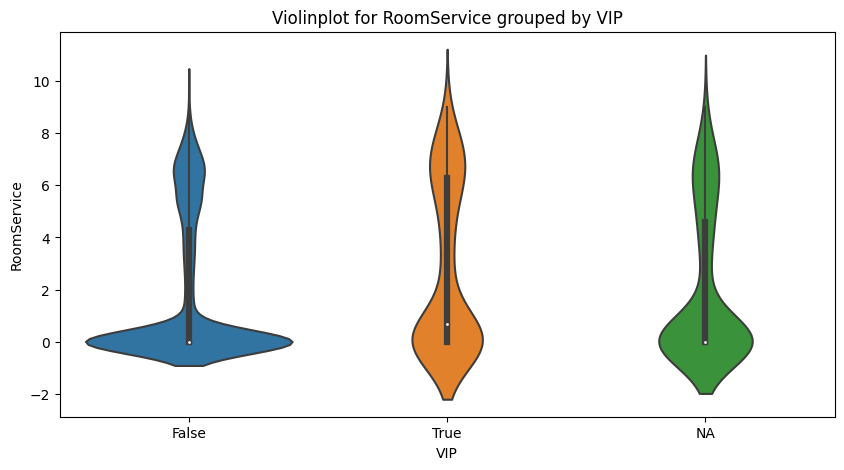

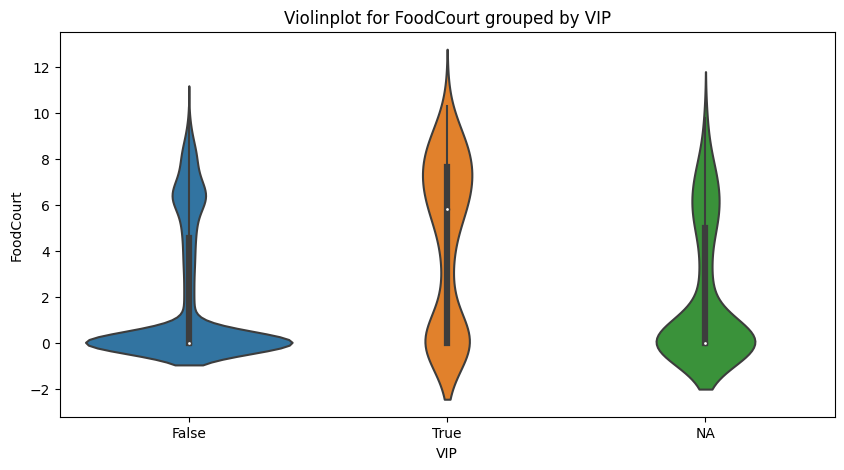

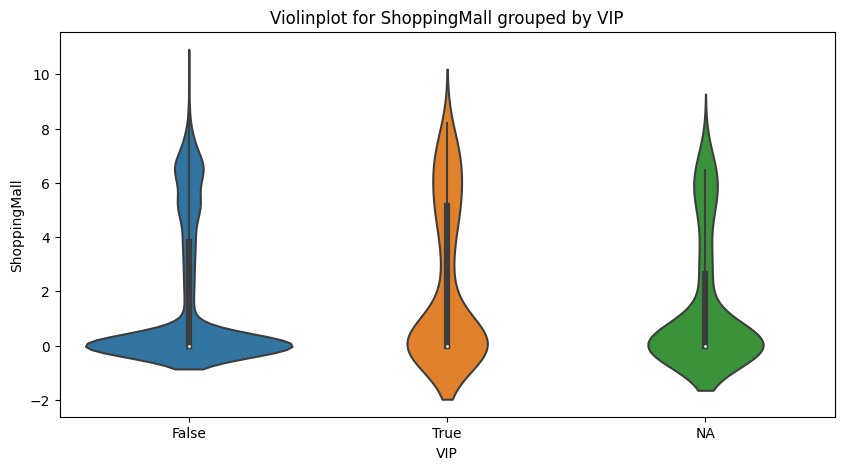

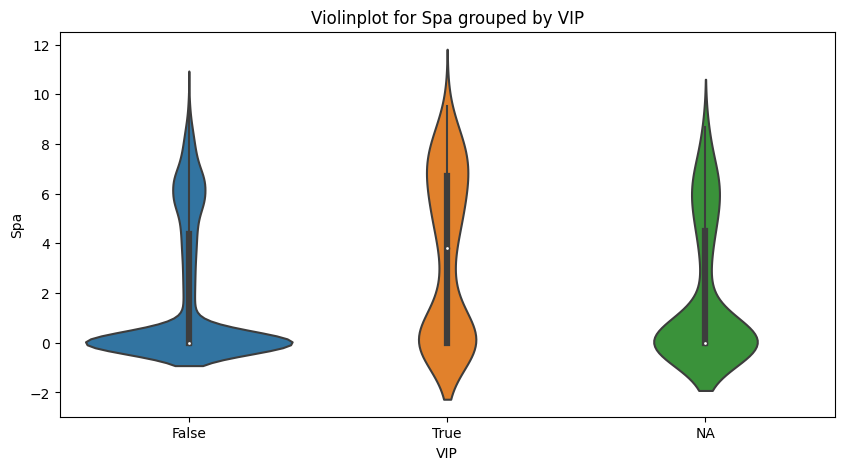

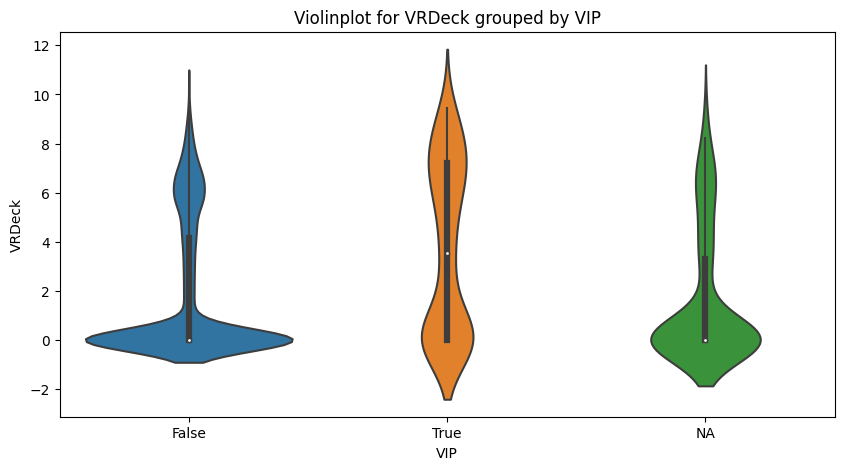

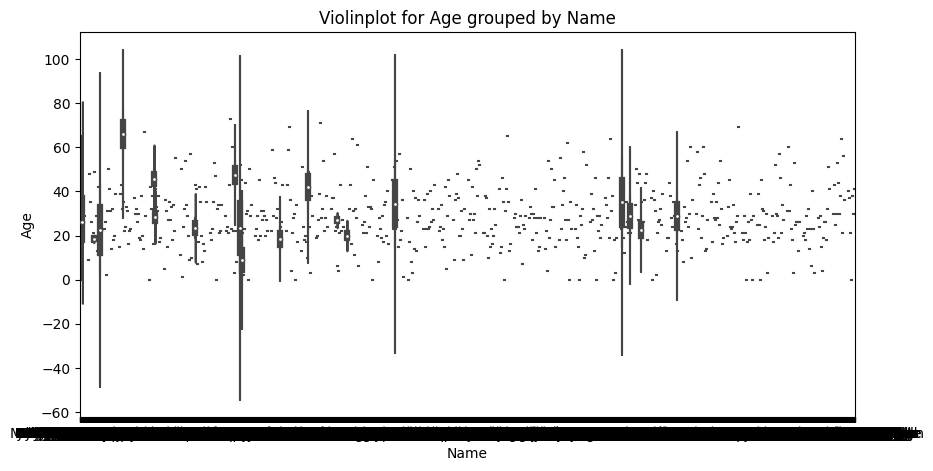

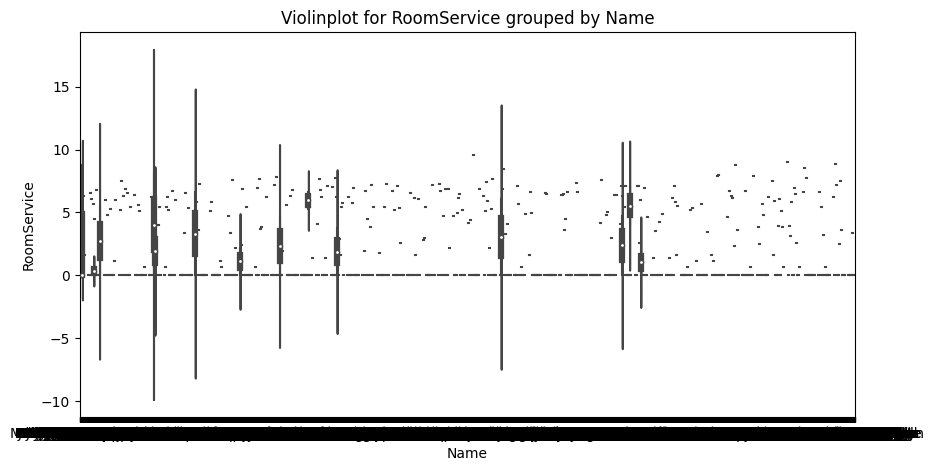

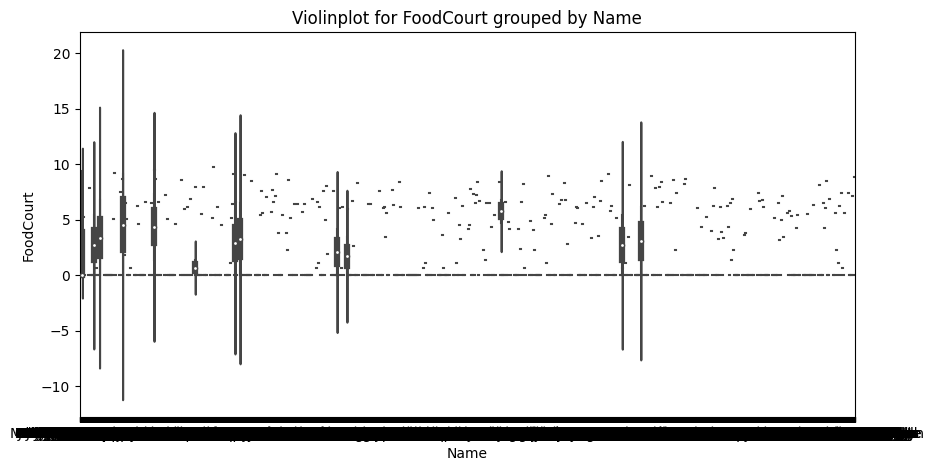

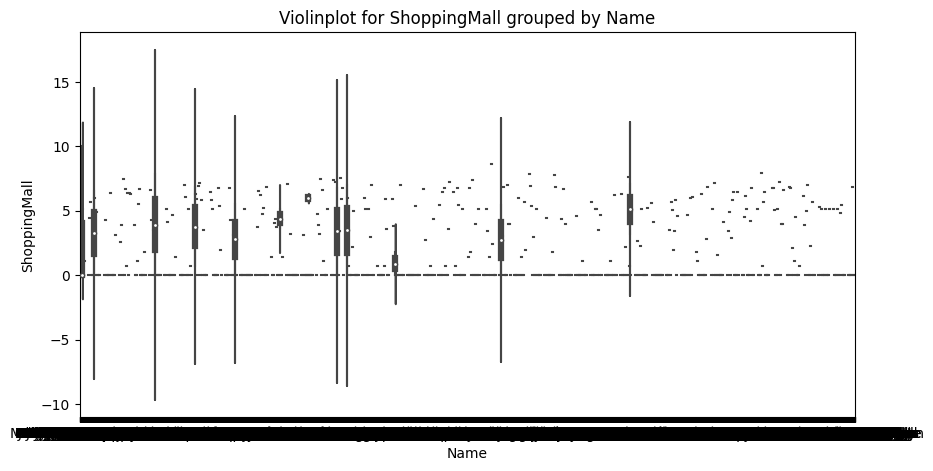

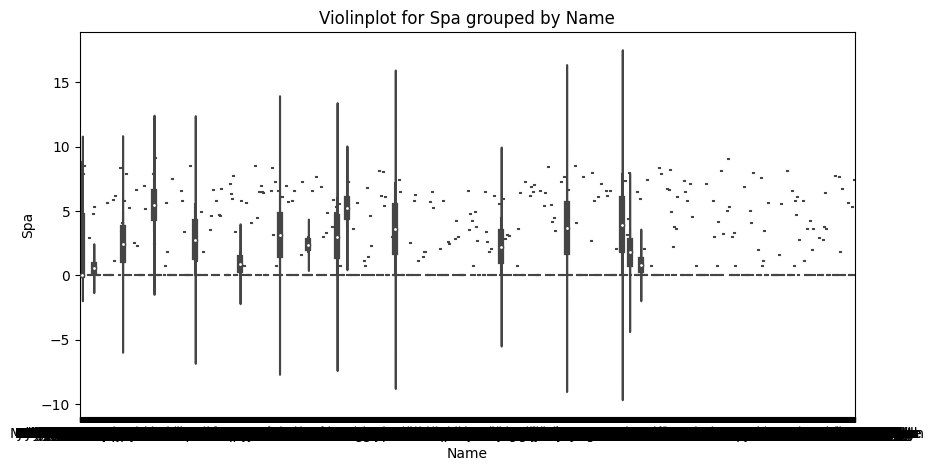

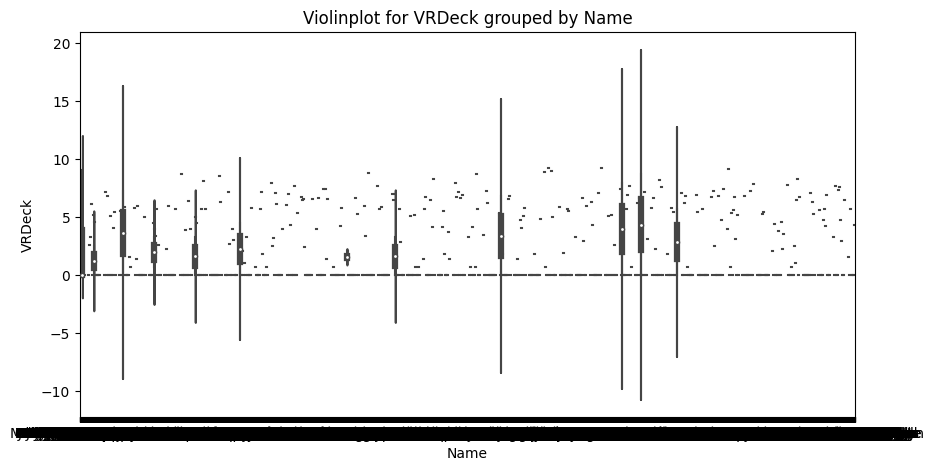

In [13]:
violinplot_cols = ['categorical_cols', 'numeric_cols'] 
plt.figure(figsize=(10, 5))
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(10, 5))
        sns.violinplot(x=cat_col, y=num_col, data=df)
        plt.title(f'Violinplot for {num_col} grouped by {cat_col}')
        plt.show()

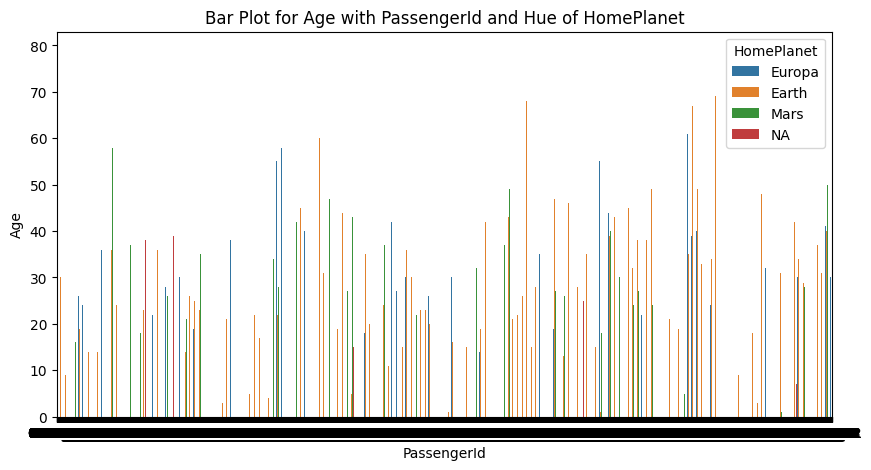

In [16]:
i = 0  # Replace with "for i in range(0, len(categorical_cols), 2):" to visualize all 
num_col = numeric_cols[0]  #  Replace with "for num_col in numeric_cols:" to visualize all

cat_col_x = categorical_cols[i]
cat_col_hue = categorical_cols[i + 1]

plt.figure(figsize=(10, 5))
sns.barplot(x=cat_col_x, y=num_col, hue=cat_col_hue, data=df)
plt.title(f'Bar Plot for {num_col} with {cat_col_x} and Hue of {cat_col_hue}')
plt.show()
